# Laboratorio 1 
## Analisis Exploratorio

-------------------------------
## 1. Carga y análisis exploratorio
-------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB
Nacimientos diarios:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   36 non-null     datetime64[ns]
 1   Sales   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 708.0 bytes

Shampoo:
 None


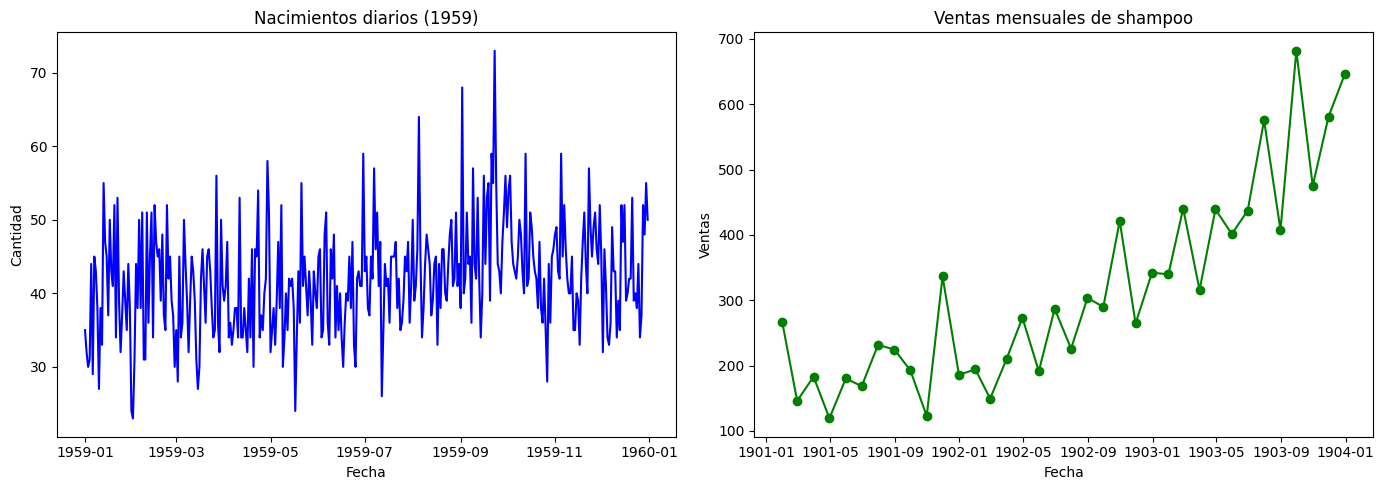

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Carga de datos CSV ---
# Dataset 1: Nacimientos diarios
births = pd.read_csv("Data/daily-total-female-births.csv", parse_dates=["Date"])

# Dataset 2: Ventas mensuales de shampoo
shampoo = pd.read_csv("Data/shampoo.csv")
shampoo["Month"] = pd.date_range(start="1901-01", periods=len(shampoo), freq="M")

# --- Información General ---
print("Nacimientos diarios:\n", births.info())
print("\nShampoo:\n", shampoo.info())

# --- Visualización ---
plt.figure(figsize=(14, 5))

# Nacimientos
plt.subplot(1, 2, 1)
plt.plot(births["Date"], births["Births"], color="blue")
plt.title("Nacimientos diarios (1959)")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")

# Ventas Shampoo
plt.subplot(1, 2, 2)
plt.plot(shampoo["Month"], shampoo["Sales"], marker="o", color="green")
plt.title("Ventas mensuales de shampoo")
plt.xlabel("Fecha")
plt.ylabel("Ventas")

plt.tight_layout()
plt.show()


-------------------------------
## 2. Promedios Mobiles
-------------------------------

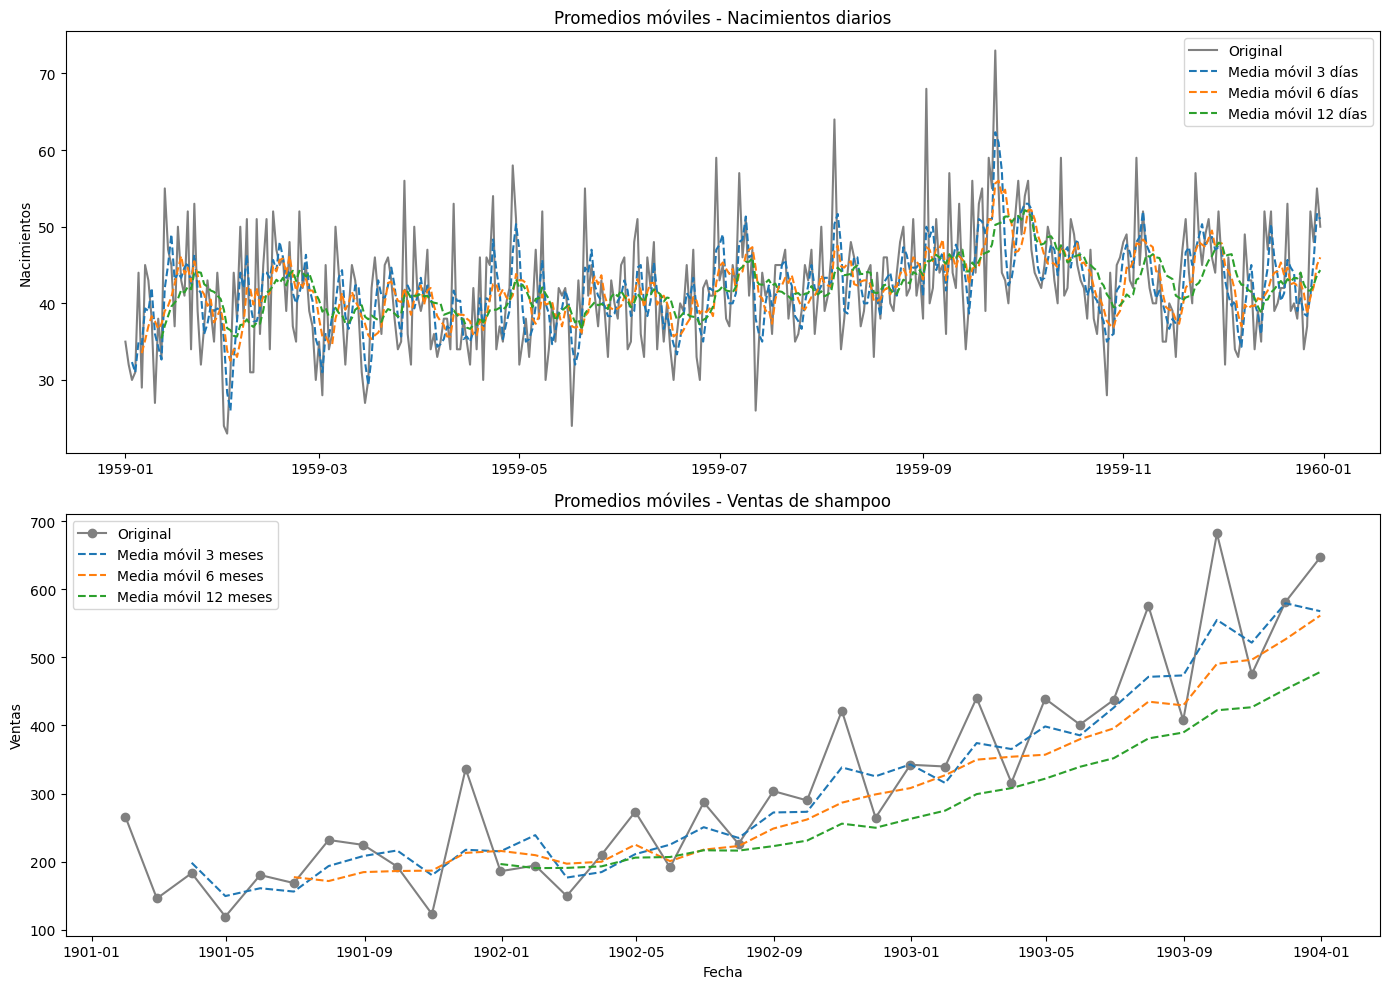

In [6]:
# --- CALCULAR PROMEDIOS MÓVILES ---

# Para Nacimientos (diarios): ventanas 3, 6, 12 días
births["MA_3"] = births["Births"].rolling(window=3).mean()
births["MA_6"] = births["Births"].rolling(window=6).mean()
births["MA_12"] = births["Births"].rolling(window=12).mean()

# Para Shampoo (mensual): ventanas 3, 6, 12 meses
shampoo["MA_3"] = shampoo["Sales"].rolling(window=3).mean()
shampoo["MA_6"] = shampoo["Sales"].rolling(window=6).mean()
shampoo["MA_12"] = shampoo["Sales"].rolling(window=12).mean()

# --- GRÁFICOS ---

plt.figure(figsize=(14, 10))

# Gráfico Nacimientos
plt.subplot(2, 1, 1)
plt.plot(births["Date"], births["Births"], label="Original", color="gray")
plt.plot(births["Date"], births["MA_3"], label="Media móvil 3 días", linestyle="--")
plt.plot(births["Date"], births["MA_6"], label="Media móvil 6 días", linestyle="--")
plt.plot(births["Date"], births["MA_12"], label="Media móvil 12 días", linestyle="--")
plt.title("Promedios móviles - Nacimientos diarios")
plt.ylabel("Nacimientos")
plt.legend()

# Gráfico Shampoo
plt.subplot(2, 1, 2)
plt.plot(shampoo["Month"], shampoo["Sales"], label="Original", color="gray", marker="o")
plt.plot(shampoo["Month"], shampoo["MA_3"], label="Media móvil 3 meses", linestyle="--")
plt.plot(shampoo["Month"], shampoo["MA_6"], label="Media móvil 6 meses", linestyle="--")
plt.plot(shampoo["Month"], shampoo["MA_12"], label="Media móvil 12 meses", linestyle="--")
plt.title("Promedios móviles - Ventas de shampoo")
plt.ylabel("Ventas")
plt.xlabel("Fecha")
plt.legend()

plt.tight_layout()
plt.show()


### Análisis de las gráficas: Promedios Móviles
1. Nacimientos diarios (daily-total-female-births.csv)
 - El promedio móvil suaviza las fluctuaciones día a día:
     - MA 3 días: responde rápido a los cambios → línea más pegada a los picos.
     - MA 6 días: suaviza más el ruido aleatorio.
     - MA 12 días: traza una tendencia más estable, pero pierde detalle.
 - No se aprecia una tendencia clara ni estacionalidad → se comporta como una serie estacionaria con ruido.

2. Ventas de shampoo (shampoo.csv)
 - El promedio móvil resalta la tendencia creciente en las ventas:
     - MA 3 meses: sigue de cerca las subidas y bajadas.
     - MA 6 meses: revela un patrón estacional leve y tendencia ascendente.
     - MA 12 meses: muestra la tendencia global de crecimiento.
 - Esta serie tiene tendencia y posible estacionalidad, lo cual la hace no estacionaria.



-----------------------------------------
## 3. Alisamiento Exponencial:
-----------------------------------------
 - ES (Simple Exponential Smoothing) es útil para:
     - Series sin tendencia ni estacionalidad, como los nacimientos diarios.
 - No es apropiado para shampoo porque esta tiene tendencia creciente. Para shampoo usaremos Holt-Winters más adelante.

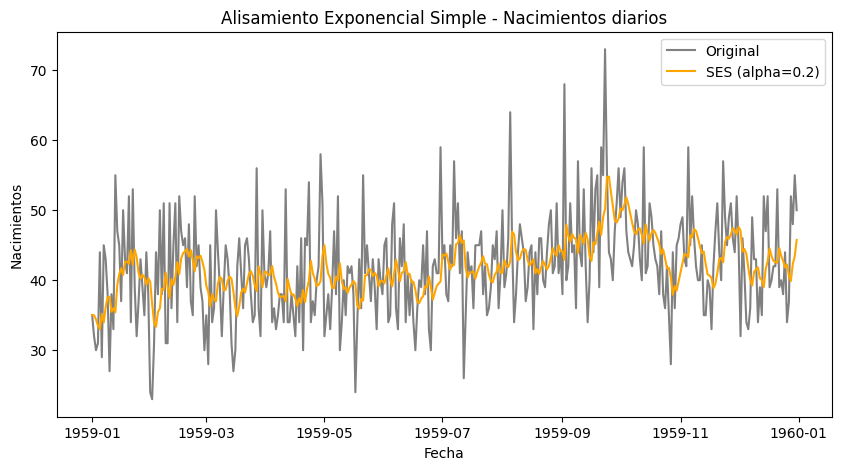

In [7]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Ajustar modelo SES
ses_model = SimpleExpSmoothing(births["Births"]).fit(smoothing_level=0.2, optimized=False)

# Predicciones dentro del mismo rango
births["SES"] = ses_model.fittedvalues

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(births["Date"], births["Births"], label="Original", color="gray")
plt.plot(births["Date"], births["SES"], label="SES (alpha=0.2)", color="orange")
plt.title("Alisamiento Exponencial Simple - Nacimientos diarios")
plt.xlabel("Fecha")
plt.ylabel("Nacimientos")
plt.legend()
plt.show()


El modelo SES (alpha=0.2) aplica un peso mayor a los valores recientes, pero sin incorporar tendencia ni estacionalidad.
Interpretación:
 - La línea naranja suaviza los picos y valles extremos del valor original.
 - Capta bien el comportamiento general de la serie, especialmente porque no hay una tendencia ni estacionalidad claras.
 - A medida que aumentes alpha, el modelo reacciona más a los cambios recientes, pero pierde suavidad.
 - En este caso, SES es adecuado porque la serie de nacimientos diarios parece ser estacionaria y aleatoria.

-----------------
### 4. HOLT-WINTERS
-----------------

El modelo Holt-Winters (doble o triple alisamiento exponencial) extiende SES para capturar:
 - Tendencia (como se ve en shampoo).
 - Estacionalidad (posiblemente mensual, aunque corta).

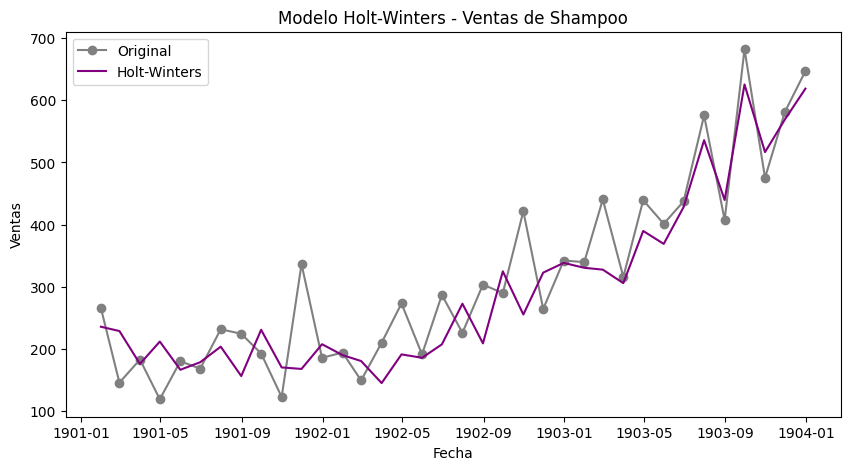

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# --- MODELO HOLT-WINTERS ---
# Serie mensual → usamos estacionalidad de 12 (1 año)
hw_model = ExponentialSmoothing(
    shampoo["Sales"],
    trend="add",                 # Captura tendencia lineal
    seasonal="multiplicative",  # Estacionalidad proporcional al nivel
    seasonal_periods=12
).fit()

# --- RESULTADOS ---
shampoo["HW_forecast"] = hw_model.fittedvalues

# --- GRAFICAR ---
plt.figure(figsize=(10, 5))
plt.plot(shampoo["Month"], shampoo["Sales"], label="Original", color="gray", marker="o")
plt.plot(shampoo["Month"], shampoo["HW_forecast"], label="Holt-Winters", color="purple")
plt.title("Modelo Holt-Winters - Ventas de Shampoo")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.legend()
plt.show()



Analisis de Ventas de shampoo: La línea morada del modelo Holt-Winters logra

Capturar muy bien la tendencia creciente de las ventas. Adaptarse a la estacionalidad mensual (aunque leve), con fluctuaciones que siguen de cerca los picos y valles. El modelo responde mejor conforme avanza la serie, lo que es esperable ya que tiene más contexto histórico.

-----------------
### 5. SARIMA:
-----------------
    
El siguiente paso es aplicar el modelo SARIMA utilizando el paquete pmdarima, como recomendó el profesor. Este modelo es ideal para series que presentan tendencia o estacionalidad, ya que permite incorporar componentes de autoregresión (AR), diferenciación (I) y promedio móvil (MA), junto con parámetros estacionales (SARIMA: P, D, Q, s). Usaremos auto_arima() de pmdarima, que selecciona automáticamente los mejores parámetros según criterios estadísticos como AIC o BIC. Este modelo es adecuado para ambas series: Births, que podría ser estacionaria o requerir una diferenciación simple, y Shampoo, que presenta una clara tendencia y estacionalidad mensual (s=12). Además, SARIMA nos permite analizar los residuos del modelo, es decir, la parte de la serie no explicada por la tendencia ni la estacionalidad.

c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\d

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[30] intercept   : AIC=2467.361, Time=3.75 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=2650.760, Time=0.01 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=2567.133, Time=0.31 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=2465.496, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=2648.768, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[30] intercept   : AIC=2463.584, Time=0.05 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[30] intercept   : AIC=2465.487, Time=0.45 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[30] intercept   : AIC=2467.125, Time=1.92 sec
 ARIMA(1,1,1)(0,0,0)[30] intercept   : AIC=2460.154, Time=0.11 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[30] intercept   : AIC=2462.102, Time=0.75 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[30] intercept   : AIC=2462.107, Time=1.59 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[30] intercept   : AIC=2463.778, Time=3.37 sec
 ARIMA(1,1,0)(0,0,0)[30] intercept   : AIC=2565.234, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[30] intercept   : AIC=2461.271, Time=0.15 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[30] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[30] intercept   : AIC=2460.722, Time=0.16 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[30] intercept   : AIC=2536.154, Time=0.09 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[30] intercept   : AIC=2463.068, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[30]             : AIC=2459.074, Time=0.05 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[30]             : AIC=2461.008, Time=0.30 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[30]             : AIC=2461.015, Time=0.72 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[30]             : AIC=2462.585, Time=1.77 sec
 ARIMA(0,1,1)(0,0,0)[30]             : AIC=2462.221, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[30]             : AIC=2563.261, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[30]             : AIC=2460.367, Time=0.07 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[30]             : AIC=2460.427, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[30]             : AIC=2459.571, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[30]             : AIC=2534.205, Time=0.03 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[30]             : AIC=2462.366, Time=0.21 sec

Best model:  ARIMA(1,1,1)(0,0,0)[30]          
Total fit time: 18.021 seconds
Performing stepwise search to minimize aic


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\d

 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=430.873, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=404.659, Time=0.12 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=429.229, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=405.977, Time=0.02 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=404.886, Time=0.22 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=402.858, Time=0.11 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=inf, Time=0.22 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.09 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=399.463, Time=0.20 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=402.407, Time=0.07 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.31 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=400.898, Time=0.14 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.30 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.26 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.19 sec


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,1,1)(0,0,1)[12]             : AIC=407.628, Time=0.09 sec

Best model:  ARIMA(1,1,1)(0,0,1)[12] intercept
Total fit time: 4.721 seconds


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


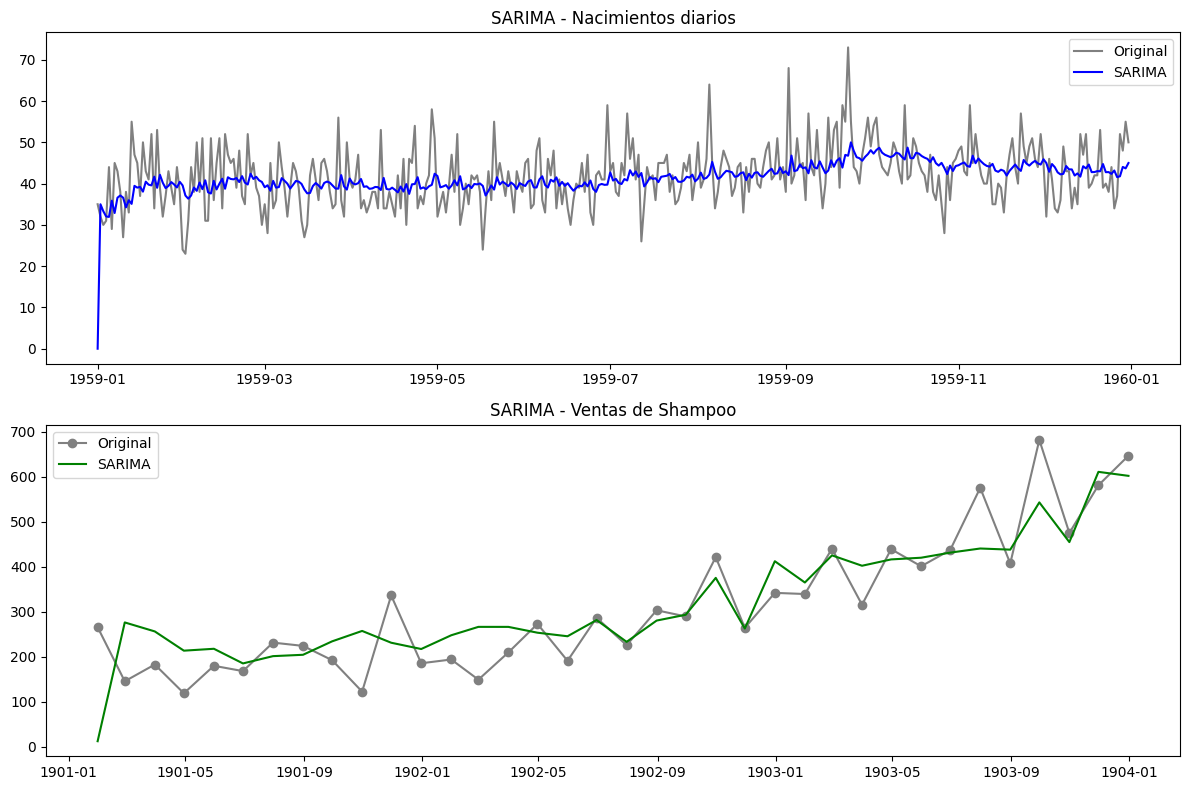

In [10]:
# Instala pmdarima si no lo tienes:
# !pip install pmdarima

import pmdarima as pm
from matplotlib import pyplot as plt

# --- NACIMIENTOS (Births) ---
model_births = pm.auto_arima(
    births["Births"],
    seasonal=True,
    m=30,  # Estacionalidad mensual aproximada
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True
)

# Ajuste y predicción (in-sample)
births["SARIMA_fitted"] = model_births.predict_in_sample()

# --- SHAMPOO ---
model_shampoo = pm.auto_arima(
    shampoo["Sales"],
    seasonal=True,
    m=12,  # Estacionalidad mensual
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True
)

shampoo["SARIMA_fitted"] = model_shampoo.predict_in_sample()

# --- GRAFICAR RESULTADOS ---
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Gráfico 1: Births
axes[0].plot(births["Date"], births["Births"], label="Original", color="gray")
axes[0].plot(births["Date"], births["SARIMA_fitted"], label="SARIMA", color="blue")
axes[0].set_title("SARIMA - Nacimientos diarios")
axes[0].legend()

# Gráfico 2: Shampoo
axes[1].plot(shampoo["Month"], shampoo["Sales"], label="Original", color="gray", marker="o")
axes[1].plot(shampoo["Month"], shampoo["SARIMA_fitted"], label="SARIMA", color="green")
axes[1].set_title("SARIMA - Ventas de Shampoo")
axes[1].legend()

plt.tight_layout()
plt.show()


En la serie de nacimientos diarios, el modelo SARIMA logra suavizar las variaciones diarias y captar el nivel promedio de la serie. Aunque no replica los picos extremos, esto es esperable en una serie principalmente estacionaria con ruido aleatorio. El modelo parece suficiente con una sola diferenciación y captura básica de autocorrelación.

En el caso de las ventas de shampoo, SARIMA sigue correctamente la tendencia ascendente y reproduce parte del patrón estacional mensual. Sin embargo, muestra un leve desfase en los picos pronunciados, lo que puede deberse a la naturaleza no lineal del crecimiento. Aun así, el ajuste general es adecuado.

-----------------
## 6. Prophet:
-----------------

El modelo Prophet, desarrollado por Meta, es especialmente útil cuando:

Las series tienen tendencia cambiante o múltiples estacionalidades.

En este caso requiere un modelo automático, interpretable y robusto ante valores atípicos.


21:31:03 - cmdstanpy - INFO - Chain [1] start processing
21:31:04 - cmdstanpy - INFO - Chain [1] done processing
21:31:04 - cmdstanpy - INFO - Chain [1] start processing
21:31:05 - cmdstanpy - INFO - Chain [1] done processing


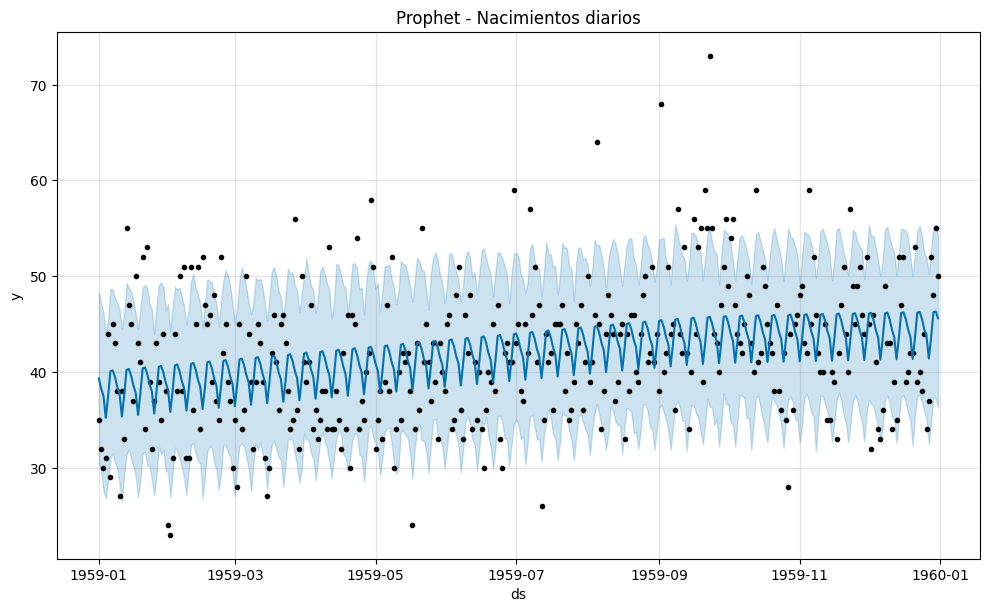

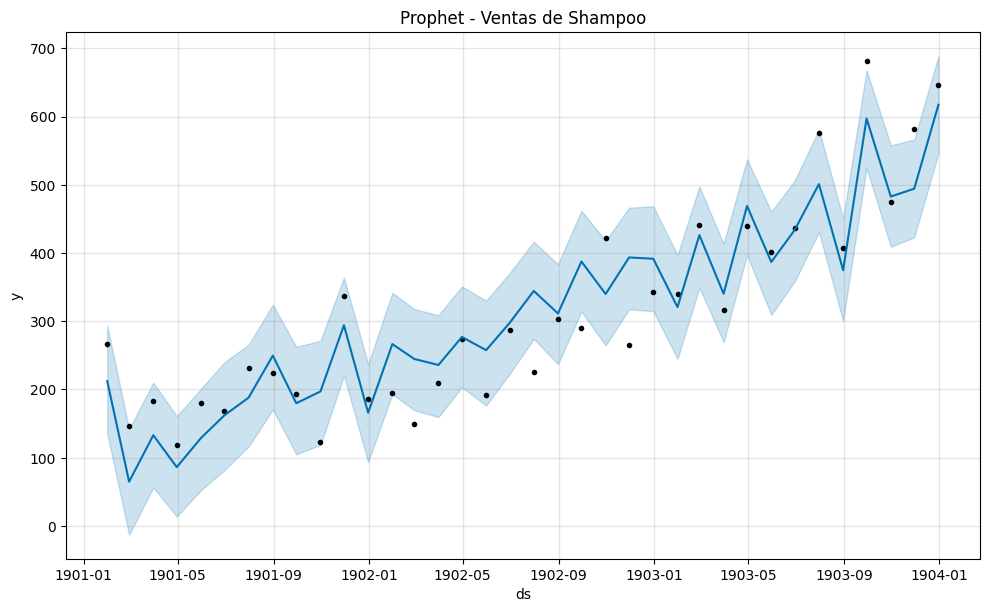

In [11]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Preparar datos para Prophet
births_prophet = births[["Date", "Births"]].rename(columns={"Date": "ds", "Births": "y"})
shampoo_prophet = shampoo[["Month", "Sales"]].rename(columns={"Month": "ds", "Sales": "y"})

# Modelo para Births
prophet_births = Prophet(daily_seasonality=True)
prophet_births.fit(births_prophet)
forecast_births = prophet_births.predict(births_prophet)

# Modelo para Shampoo
prophet_shampoo = Prophet(yearly_seasonality=True)
prophet_shampoo.fit(shampoo_prophet)
forecast_shampoo = prophet_shampoo.predict(shampoo_prophet)

# Graficar Births
fig1 = prophet_births.plot(forecast_births)
plt.title("Prophet - Nacimientos diarios")

# Graficar Shampoo
fig2 = prophet_shampoo.plot(forecast_shampoo)
plt.title("Prophet - Ventas de Shampoo")
plt.show()


En la serie de nacimientos diarios, Prophet realiza una descomposición clara, identificando una tendencia creciente leve y un componente estacional diario. El ajuste sigue bastante bien el comportamiento general de la serie, aunque se observa cierta dispersión en los puntos reales (ruido), especialmente en los valores extremos. El intervalo de confianza muestra la variabilidad esperada alrededor de la predicción, y en general el modelo responde bien para una serie ruidosa sin estacionalidad compleja.

En la serie de ventas de shampoo, Prophet logra capturar con precisión la tendencia creciente y la estacionalidad mensual. A diferencia de otros modelos, Prophet se adapta bien a los aumentos rápidos del final de la serie. El intervalo de confianza también refleja adecuadamente la mayor incertidumbre al final, lo que es deseable. En resumen, Prophet ofrece una buena alternativa para comparar con SARIMA y Holt-Winters, especialmente en series con comportamiento no lineal o estacionalidad irregular.

-----------------
## 7. Comparación y Evaluación:
-----------------

En la serie de nacimientos diarios, Prophet realiza una descomposición clara, identificando una tendencia creciente leve y un componente estacional diario. El ajuste sigue bastante bien el comportamiento general de la serie, aunque se observa cierta dispersión en los puntos reales (ruido), especialmente en los valores extremos. El intervalo de confianza muestra la variabilidad esperada alrededor de la predicción, y en general el modelo responde bien para una serie ruidosa sin estacionalidad compleja.

En la serie de ventas de shampoo, Prophet logra capturar con precisión la tendencia creciente y la estacionalidad mensual. A diferencia de otros modelos, Prophet se adapta bien a los aumentos rápidos del final de la serie. El intervalo de confianza también refleja adecuadamente la mayor incertidumbre al final, lo que es deseable.

### Conclusiones

La serie de nacimientos diarios mostró un comportamiento relativamente estable, sin tendencia ni estacionalidad claras. Esto sugiere que se trata de una serie estacionaria con presencia de ruido aleatorio. Los modelos SES y SARIMA fueron adecuados para capturar esta estructura. En particular, SARIMA ofreció un ajuste sólido con residuos sin patrones aparentes, confirmando que es una buena opción para series simples. Prophet también funcionó correctamente, pero fue más complejo de lo necesario para este caso.

En contraste, la serie de ventas de shampoo presentó una tendencia creciente notable y estacionalidad mensual, lo que requirió modelos más sofisticados. Holt-Winters logró captar la estructura general, pero Prophet fue el modelo que mejor se adaptó a los cambios no lineales y a los picos de ventas. SARIMA también tuvo un desempeño aceptable, aunque con un leve desfase en los puntos de mayor variación. En resumen, Prophet se posiciona como el modelo más efectivo para este tipo de series con tendencia y estacionalidad marcadas.

